# Co2량과 학습능률 지수

### 1. 데이터 확인

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from matplotlib import font_manager, rc
font_path = "C:/KHR/PYDATAexam/data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


In [118]:
# 데이터 로드 (3월 29일 ~ 5월 29일)
df1 = pd.read_csv("IoT도시데이터마포구중앙도서관공기질1.csv", encoding='CP949', header=0)
df2 = pd.read_csv("IoT도시데이터마포구중앙도서관공기질2.csv", encoding='CP949', header=0)
df3 = pd.read_csv("IoT도시데이터마포구중앙도서관공기질3.csv", encoding='CP949', header=0)
df4 = pd.read_csv("IoT도시데이터마포구중앙도서관공기질4.csv", encoding='CP949', header=0)
df5 = pd.read_csv("IoT도시데이터마포구중앙도서관공기질5.csv", encoding='CP949', header=0)
df6 = pd.read_csv("IoT도시데이터마포구중앙도서관공기질6.csv", encoding='CP949', header=0)
df7 = pd.read_csv("IoT도시데이터마포구중앙도서관공기질7.csv", encoding='CP949', header=0)
df8 = pd.read_csv("IoT도시데이터마포구중앙도서관공기질8.csv", encoding='CP949', header=0)# 0.42

df_co2 =  pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])

In [119]:
# 데이터 확인
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)


display(df_co2.head(5))
print(df_co2.shape)

(3199, 15)
(10412, 15)
(285, 15)
(2950, 15)
(2782, 15)
(3237, 15)
(3369, 15)
(2859, 15)


,기관 명,송신 서버 번호,데이터 번호,모델명,시리얼,데이터관측일시,온도(℃),습도(%),미세먼지(㎍/㎥),소음(㏈),이산화탄소(ppm),휘발성유기화합물(ppb),초미세먼지(㎍/㎥),학습능률지수(%),등록일자
0,마포구,22,2,AirGuard-K,V01G1613537,202105030845,22.7,34,10,41,700,919,7,75,2021-05-03 08:49:17
1,마포구,22,2,AirGuard-K,V01G1613539,202105030845,22.1,36,39,50,434,326,28,77,2021-05-03 08:49:26
2,마포구,22,2,AirGuard-K,V01G1613543,202104201655,23.8,26,88,51,596,343,65,64,2021-05-03 08:49:35
3,마포구,22,2,AirGuard-K,V01G1613544,202105030845,20.5,39,17,43,513,160,12,71,2021-05-03 08:49:50
4,마포구,22,2,AirGuard-K,V01G1613600,202105030845,20.8,39,17,37,472,159,12,72,2021-05-03 08:50:08


(29093, 15)


### 2. 데이터 전처리

In [120]:
df_co2.columns = ['기관명', '송신서버번호', '데이터번호', '모델명', '시리얼', '관측일시', '온도', '습도', '미세먼지', '소음', '이산화탄소', '휘발성유기화합물', '초미세먼지', '학습능률지수', '등록일자']
df_co2.info()
df = df_co2[['온도', '습도', '미세먼지', '소음', '이산화탄소', '휘발성유기화합물', '초미세먼지', '학습능률지수']]
df = df.apply(pd.to_numeric, errors = 'coerce')
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29093 entries, 0 to 2858
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기관명       29093 non-null  object
 1   송신서버번호    29093 non-null  object
 2   데이터번호     29093 non-null  object
 3   모델명       29093 non-null  object
 4   시리얼       29093 non-null  object
 5   관측일시      29093 non-null  object
 6   온도        29093 non-null  object
 7   습도        29093 non-null  object
 8   미세먼지      29093 non-null  object
 9   소음        29093 non-null  object
 10  이산화탄소     29093 non-null  object
 11  휘발성유기화합물  29093 non-null  object
 12  초미세먼지     29093 non-null  object
 13  학습능률지수    29093 non-null  object
 14  등록일자      29093 non-null  object
dtypes: object(15)
memory usage: 3.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29093 entries, 0 to 2858
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   온도        29091

,온도,습도,미세먼지,소음,이산화탄소,휘발성유기화합물,초미세먼지,학습능률지수
0,22.7,34.0,10.0,41.0,700.0,919.0,7.0,75.0
1,22.1,36.0,39.0,50.0,434.0,326.0,28.0,77.0
2,23.8,26.0,88.0,51.0,596.0,343.0,65.0,64.0
3,20.5,39.0,17.0,43.0,513.0,160.0,12.0,71.0
4,20.8,39.0,17.0,37.0,472.0,159.0,12.0,72.0
...,...,...,...,...,...,...,...,...
2854,22.8,34.0,32.0,32.0,620.0,312.0,23.0,77.0
2855,24.0,34.0,17.0,45.0,450.0,403.0,12.0,74.0
2856,20.1,19.0,57.0,44.0,559.0,240.0,42.0,59.0
2857,20.8,19.0,5.0,59.0,585.0,340.0,3.0,58.0


Text(0.5, 1.0, 'Boxplot of 학습능률지수')

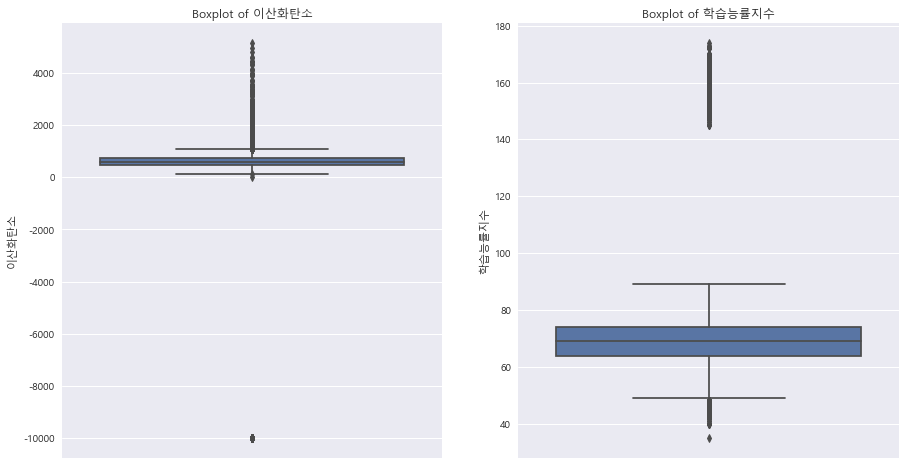

In [121]:
# 이상치 확인
fig, ax = plt.subplots(1, 2, figsize=(15,8))

sns.boxplot(y=df["이산화탄소"],data=df, ax=ax[0])
ax[0].set_title("Boxplot of 이산화탄소")

sns.boxplot(y=df["학습능률지수"],data=df, ax=ax[1])
ax[1].set_title("Boxplot of 학습능률지수")

Text(0.5, 1.0, 'Boxplot of 초미세먼지')

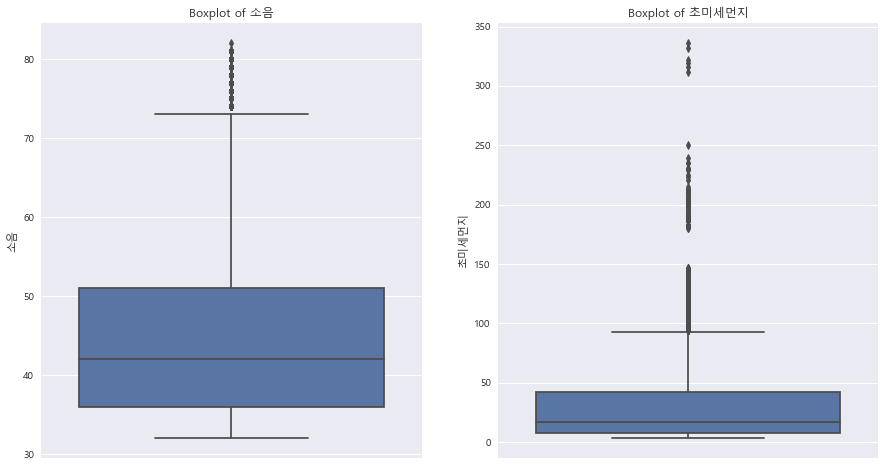

In [122]:
# 이상치 확인
fig, ax = plt.subplots(1, 2, figsize=(15,8))

sns.boxplot(y=df["소음"],data=df, ax=ax[0])
ax[0].set_title("Boxplot of 소음")

sns.boxplot(y=df["초미세먼지"],data=df, ax=ax[1])
ax[1].set_title("Boxplot of 초미세먼지")

C:\Users\H\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='이산화탄소'>

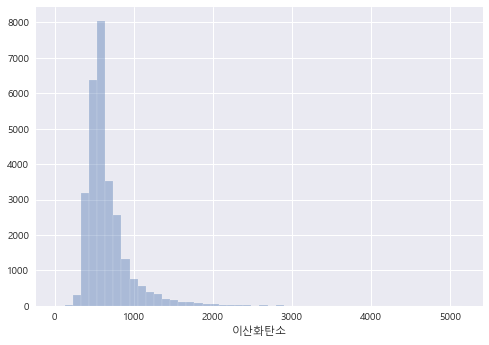

In [123]:
# 이산화탄소 이상치 제거 -10000
df = df.loc[df.이산화탄소>0, :]
sns.distplot(df['이산화탄소'], kde=False, label='이산화탄소')

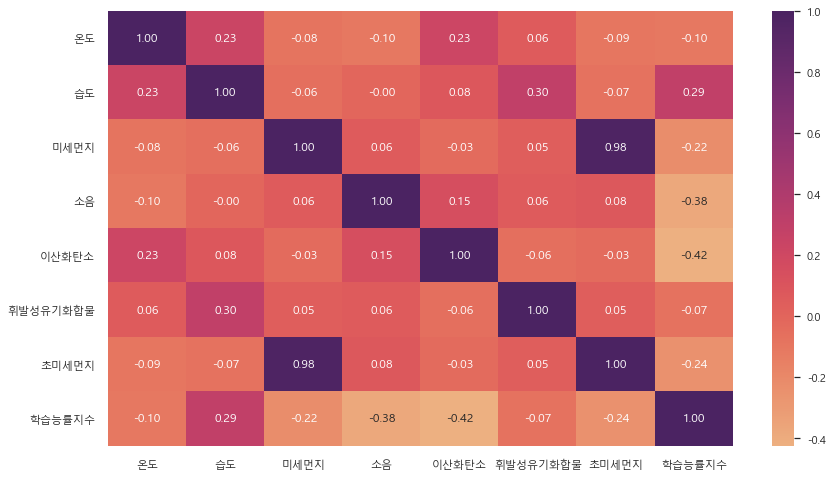

In [124]:
#상관관계 확인
sns.set(font=font_name, rc={'figure.figsize':(14,8), "axes.unicode_minus":False})
corr = df.corr()
hm = sns.heatmap(corr, annot = True, fmt = ".2f", cmap="flare")

hm.get_figure().savefig("이산화탄소와학습능률지수상관관계.png")

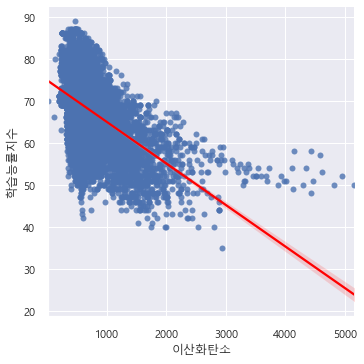

In [129]:
# 9-1. 이산화탄소와 학습능률지수 회귀분석 그래프
lp = sns.lmplot(x="이산화탄소", y="학습능률지수", data=df, line_kws={'color':"red"})

In [127]:
#상관관계 수치로 확인
# 종속변수('Class')와의 상관관계
Corr = df.corr()
IF = Corr['학습능률지수'].sort_values().to_frame()
display(IF.head(5))
print(IF)

,학습능률지수
이산화탄소,-0.424775
소음,-0.376929
초미세먼지,-0.242807
미세먼지,-0.219093
온도,-0.102074


            학습능률지수
이산화탄소    -0.424775
소음       -0.376929
초미세먼지    -0.242807
미세먼지     -0.219093
온도       -0.102074
휘발성유기화합물 -0.072276
습도        0.294892
학습능률지수    1.000000
